In [1]:
import pandas as pd

In [2]:
series = pd.Series(['BMW', 'Toyota', 'Honda'])

In [3]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [4]:
colors = pd.Series(['Red', 'Blue', 'White'])
colors

0      Red
1     Blue
2    White
dtype: object

In [5]:
car_data = pd.DataFrame({'Car make': series, 'Color':colors})
car_data

,Car make,Color
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [91]:
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Describe Data

In [7]:
## Attribute
car_sales.dtypes

# Function
#car_sales.to_csv()

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [8]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [9]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [92]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [11]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [12]:
car_sales.mean()

/var/folders/sz/gl8cz95x7r5gky1zzt4ywwb40000gn/T/ipykernel_1316/4073448239.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_sales.mean()


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [13]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [93]:
car_sales['Doors'].sum()

40

In [15]:
len(car_sales)

10

 ### Viewing and selecting data

In [16]:
# .loc & #.iloc

animals = pd.Series(['cat', 'dog', 'bird', 'panda', 'snake'],
                   index = [0,3,9,8,3])

In [17]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [18]:
animals.loc[3]

3      dog
3    snake
dtype: object

In [19]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [131]:
car_sales.iloc[3]

Make                       bmw
Colour                   Black
Odometer (KM)         6986.875
Doors                        5
Price                    22000
Seats                      5.0
Fuel per 100 Km            9.6
Total fuel used       1073.184
number of wheels             4
Passed road safety        True
Name: 3, dtype: object

In [20]:
animals.iloc[3]

'panda'

In [21]:
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [22]:
car_sales.loc[:3]
#car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [94]:
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [24]:
car_sales[car_sales['Make'] == 'Toyota']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [25]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [26]:
car_sales.groupby(['Make']).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

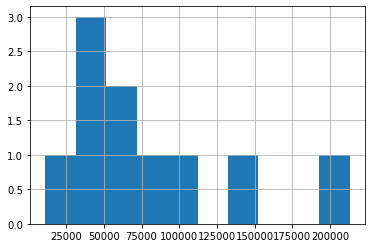

In [95]:
car_sales['Odometer (KM)'].hist()

In [103]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','').astype(str).str[:-2].astype(int)

/var/folders/sz/gl8cz95x7r5gky1zzt4ywwb40000gn/T/ipykernel_1316/1408859712.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','').astype(str).str[:-2].astype(int)


<AxesSubplot:>

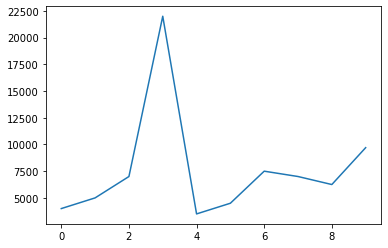

In [36]:
car_sales['Price'].plot()

In [96]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Manipulating Data

In [97]:
car_sales['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [98]:
car_sales['Make'] = car_sales['Make'].str.lower()

In [99]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,"$4,000.00"
1,honda,Red,87899,4,"$5,000.00"
2,toyota,Blue,32549,3,"$7,000.00"
3,bmw,Black,11179,5,"$22,000.00"
4,nissan,White,213095,4,"$3,500.00"


In [44]:
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')

In [45]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [51]:
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean(), 
                                    inplace = True)

In [55]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [54]:
car_sales_missing.dropna(inplace = True)

In [61]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")

In [62]:
car_sales_missing_dropped = car_sales_missing.dropna()

In [64]:
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [65]:
car_sales_missing_dropped.to_csv('car-sales-missing-dropped.csv')

In [100]:
# Column from series

seats_column = pd.Series([5,5,5,5,5])

# New column called seats
car_sales['Seats'] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,"$4,000.00",5.0
1,honda,Red,87899,4,"$5,000.00",5.0
2,toyota,Blue,32549,3,"$7,000.00",5.0
3,bmw,Black,11179,5,"$22,000.00",5.0
4,nissan,White,213095,4,"$3,500.00",5.0
5,toyota,Green,99213,4,"$4,500.00",NaN
6,honda,Blue,45698,4,"$7,500.00",NaN
7,honda,Blue,54738,4,"$7,000.00",NaN
8,toyota,White,60000,4,"$6,250.00",NaN
9,nissan,White,31600,4,"$9,700.00",NaN


In [105]:
car_sales['Seats'].fillna(5, inplace = True)

In [106]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000,5.0
1,honda,Red,87899,4,5000,5.0
2,toyota,Blue,32549,3,7000,5.0
3,bmw,Black,11179,5,22000,5.0
4,nissan,White,213095,4,3500,5.0
5,toyota,Green,99213,4,4500,5.0
6,honda,Blue,45698,4,7500,5.0
7,honda,Blue,54738,4,7000,5.0
8,toyota,White,60000,4,6250,5.0
9,nissan,White,31600,4,9700,5.0


In [107]:
# Column from Python list

fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 5.4]

In [108]:
car_sales['Fuel per 100 Km'] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km
0,toyota,White,150043,4,4000,5.0,7.5
1,honda,Red,87899,4,5000,5.0,9.2
2,toyota,Blue,32549,3,7000,5.0,5.0
3,bmw,Black,11179,5,22000,5.0,9.6
4,nissan,White,213095,4,3500,5.0,8.7
5,toyota,Green,99213,4,4500,5.0,4.7
6,honda,Blue,45698,4,7500,5.0,7.6
7,honda,Blue,54738,4,7000,5.0,8.7
8,toyota,White,60000,4,6250,5.0,3.0
9,nissan,White,31600,4,9700,5.0,5.4


In [109]:
car_sales['Total fuel used'] = car_sales['Odometer (KM)']/100 * car_sales['Fuel per 100 Km']

In [110]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used
0,toyota,White,150043,4,4000,5.0,7.5,11253.225
1,honda,Red,87899,4,5000,5.0,9.2,8086.708
2,toyota,Blue,32549,3,7000,5.0,5.0,1627.450
3,bmw,Black,11179,5,22000,5.0,9.6,1073.184
4,nissan,White,213095,4,3500,5.0,8.7,18539.265
5,toyota,Green,99213,4,4500,5.0,4.7,4663.011
6,honda,Blue,45698,4,7500,5.0,7.6,3473.048
7,honda,Blue,54738,4,7000,5.0,8.7,4762.206
8,toyota,White,60000,4,6250,5.0,3.0,1800.000
9,nissan,White,31600,4,9700,5.0,5.4,1706.400


In [111]:
# Create a column from a single value

car_sales['number of wheels'] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used,number of wheels
0,toyota,White,150043,4,4000,5.0,7.5,11253.225,4
1,honda,Red,87899,4,5000,5.0,9.2,8086.708,4
2,toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4
3,bmw,Black,11179,5,22000,5.0,9.6,1073.184,4
4,nissan,White,213095,4,3500,5.0,8.7,18539.265,4
5,toyota,Green,99213,4,4500,5.0,4.7,4663.011,4
6,honda,Blue,45698,4,7500,5.0,7.6,3473.048,4
7,honda,Blue,54738,4,7000,5.0,8.7,4762.206,4
8,toyota,White,60000,4,6250,5.0,3.0,1800.000,4
9,nissan,White,31600,4,9700,5.0,5.4,1706.400,4


In [112]:
car_sales['Passed road safety'] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used,number of wheels,Passed road safety
0,toyota,White,150043,4,4000,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,5000,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,22000,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,3500,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,4500,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,7500,5.0,7.6,3473.048,4,True
7,honda,Blue,54738,4,7000,5.0,8.7,4762.206,4,True
8,toyota,White,60000,4,6250,5.0,3.0,1800.000,4,True
9,nissan,White,31600,4,9700,5.0,5.4,1706.400,4,True


In [113]:
car_sales.dtypes

Make                   object
Colour                 object
Odometer (KM)           int64
Doors                   int64
Price                   int64
Seats                 float64
Fuel per 100 Km       float64
Total fuel used       float64
number of wheels        int64
Passed road safety       bool
dtype: object

In [114]:
car_sales_shuffled = car_sales.sample(frac = 1)

In [124]:
car_sales_shuffled.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used,number of wheels,Passed road safety
0,toyota,White,150043,4,4000,5.0,7.5,11253.225,4,True
2,toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4,True


In [127]:
car_sales_shuffled.reset_index(drop = True, inplace = True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used,number of wheels,Passed road safety
0,toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4,True
1,nissan,White,213095,4,3500,5.0,8.7,18539.265,4,True
2,nissan,White,31600,4,9700,5.0,5.4,1706.400,4,True
3,toyota,White,150043,4,4000,5.0,7.5,11253.225,4,True
4,honda,Blue,45698,4,7500,5.0,7.6,3473.048,4,True
5,bmw,Black,11179,5,22000,5.0,9.6,1073.184,4,True
6,honda,Blue,54738,4,7000,5.0,8.7,4762.206,4,True
7,toyota,White,60000,4,6250,5.0,3.0,1800.000,4,True
8,toyota,Green,99213,4,4500,5.0,4.7,4663.011,4,True
9,honda,Red,87899,4,5000,5.0,9.2,8086.708,4,True


In [128]:
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].apply(lambda x: x/1.6)

In [129]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 Km,Total fuel used,number of wheels,Passed road safety
0,toyota,White,93776.875,4,4000,5.0,7.5,11253.225,4,True
1,honda,Red,54936.875,4,5000,5.0,9.2,8086.708,4,True
2,toyota,Blue,20343.125,3,7000,5.0,5.0,1627.450,4,True
3,bmw,Black,6986.875,5,22000,5.0,9.6,1073.184,4,True
4,nissan,White,133184.375,4,3500,5.0,8.7,18539.265,4,True
5,toyota,Green,62008.125,4,4500,5.0,4.7,4663.011,4,True
6,honda,Blue,28561.250,4,7500,5.0,7.6,3473.048,4,True
7,honda,Blue,34211.250,4,7000,5.0,8.7,4762.206,4,True
8,toyota,White,37500.000,4,6250,5.0,3.0,1800.000,4,True
9,nissan,White,19750.000,4,9700,5.0,5.4,1706.400,4,True
